In [44]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
subs_raw=pd.read_pickle('../Datasets/Main Dataset/submissions.pickle')
#coms_raw=pd.read_pickle('../Datasets/comments.pickle')

#bs=subs_raw[subs_raw.topic2=='Bitcoin']
#temp=bs[[   'sent_ntusd', 'sent_ntusd_wavg', 'sent_ntusd_coms',
#       'sent_ntusd_coms_wavg', 'sent_lr', 'sent_lr_coms', 'sent_db', 'sent_fb',
#       'sent_fbt', 'sent_dbe_sadness', 'sent_dbe_joy', 'sent_dbe_love',
#       'sent_dbe_anger', 'sent_dbe_fear', 'sent_dbe_surprise']].replace(0,np.nan)

#bs=pd.concat([bs.drop(columns=temp.columns),temp],axis=1)
#bs['volume']=1

subs=subs_raw[['author', 'author_karma', 'author_posts',
       'num_comments', 'score', 'title', 'selftext', 
       'award_name','award_description', 'award_count', 'award_coin_price','awards_value',
       'subreddit',  'id',
       'domain', 'author_fullname',
       'subreddit_id', 'permalink', 'url', 'created', 'author_created',
    ]]

subs['volume']=1

print("Submission shape: ",subs.shape)



C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Submission shape:  (1559351, 22)


## Subreddits

In [2]:
import plotly.graph_objects as go
y=subs.groupby('subreddit').count().id.sort_values(ascending=True).index
x=subs.groupby('subreddit').count().id.sort_values(ascending=True).values
fig = go.Figure([go.Bar(x=x, y=y,orientation='h')])
fig.update_layout(
    title="Subreddit Activity",
    title_x = 0.5,
    xaxis_title="Number of Posts",
    yaxis_title="Subreddit",
    width=900, height=700,
    font=dict(
        #family="Courier New, monospace",
        size=18,
        #color="RebeccaPurple"
    )
)
fig.show()

# TOPIC Bitcoin

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import os 
import sys
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki')
sys.path.append(str(p))
from CryptoSent.tools.crypto_coin_actual import get_btc_actual_hourly

from CryptoSent.tools import evaluation as eval
from datetime import datetime
bc=pd.read_pickle("../Datasets/Main Dataset/bitcoin_comments.pickle")
bs=pd.read_pickle("../Datasets/Main Dataset/bitcoin_submissions.pickle")
bs['volume']=1
btc_raw=get_btc_actual_hourly()

## number of users

In [16]:
pd.concat([bc.author,bs.author]).nunique()

380008

In [33]:
import plotly.graph_objects as go
y=bs.groupby('subreddit').count().id.sort_values(ascending=True).index
x=bs.groupby('subreddit').count().id.sort_values(ascending=True).values
fig = go.Figure([go.Bar(x=x, y=y,orientation='h')])
fig.update_layout(
    title="Posts Volume by Subreddit",
    title_x = 0.61,
    xaxis_title="Number of Posts",
    yaxis_title="Subreddit",
    width=900, height=900,
    font=dict(
        #family="Courier New, monospace",
        size=22,
        #color="RebeccaPurple"
    )
)
fig.show()

In [31]:
import plotly.graph_objects as go
y=bc.groupby('subreddit').count().id.sort_values(ascending=True).index
x=bc.groupby('subreddit').count().id.sort_values(ascending=True).values
fig = go.Figure([go.Bar(x=x, y=y,orientation='h')])
fig.update_layout(
    title="Comment Volume by Subreddit",
    title_x = 0.61,
    xaxis_title="Number of Comment",
    yaxis_title="Subreddit",
    width=900, height=900,
    font=dict(
        #family="Courier New, monospace",
        size=22,
        #color="RebeccaPurple"
    )
)
fig.show()

## authors

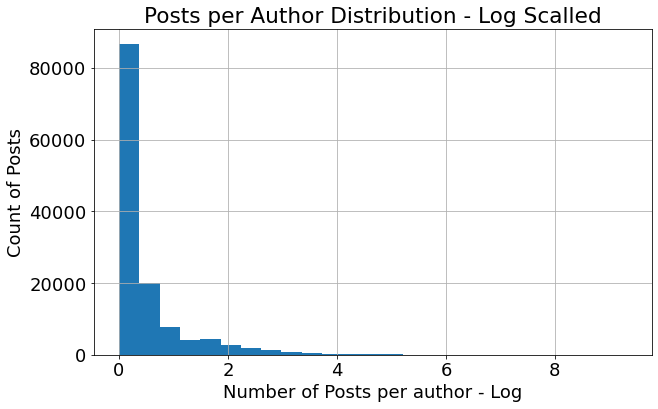

In [10]:
temp=bs[bs.author!='[deleted]'].groupby('author').count().id.sort_values(ascending=False).tail(-1).apply(np.log)
temp=temp.reset_index().rename(columns={'id':'Post Volume Log','author':'Author'})
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()

temp.hist(bins=25)
plt.xlabel('Number of Posts per author - Log')
plt.ylabel('Count of Posts')
plt.title('Posts per Author Distribution - Log Scalled')
#fig.tight_layout()
plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



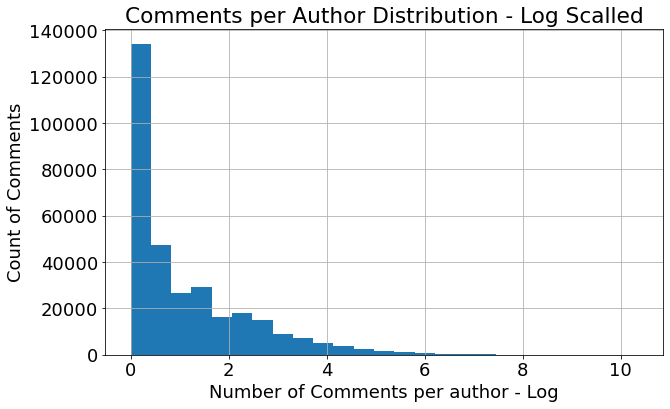

In [9]:
temp=bc[bc.author!='[deleted]'].groupby('author').count().id.sort_values(ascending=False).tail(-1).apply(np.log)
temp=temp.reset_index().rename(columns={'id':'Post Volume Log','author':'Author'})
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()

temp.hist(bins=25)
plt.xlabel('Number of Comments per author - Log')
plt.ylabel('Count of Comments')
plt.title('Comments per Author Distribution - Log Scalled')
#fig.tight_layout()
plt.savefig('author_comment_hist.png',bbox_inches='tight')
plt.show()



## influence

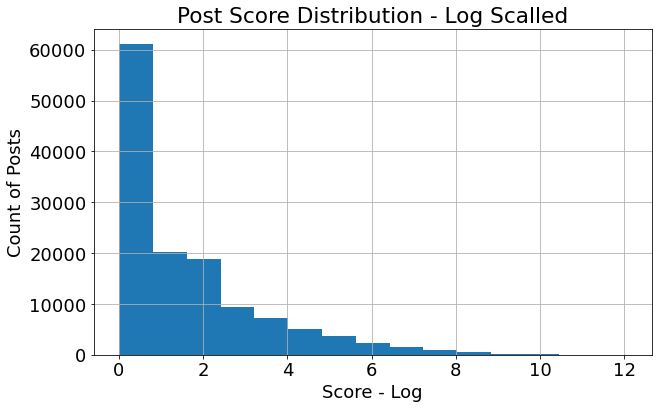

In [35]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()
(pd.DataFrame(bs[bs.author!='[deleted]'].groupby('author').score.sum()).score+1).apply(np.log).hist(bins=15)

plt.xlabel('Score - Log')
plt.ylabel('Count of Posts')
plt.title('Post Score Distribution - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



## Timelines

In [43]:
import plotly.express as px
temp=bs.pivot_table(index=bs.index,values='volume',columns='subreddit',aggfunc=sum)[['Bitcoin','CryptoCurrency','btc']].resample('w').sum().head(-1)
temp=temp.rename(columns={'subreddit':'Subreddit'})
fig = px.line(temp)

fig.update_layout(
    title="Top 3 Subreddit Post Trend - Weekly",
    title_x = .09,
    xaxis_title="<b> Date  </b>",
    yaxis_title="<b>Number of Posts  </b>",
    width=1500, height=750,
    font=dict(
        #family="Courier New, monospace",
        size=24,
        #color="RebeccaPurple"
    )
)

fig.update_layout(legend=dict(
    title='Subreddit  ',
    orientation="h",
    yanchor="bottom",
    y=1.07,
    xanchor="right",
    x=1
    )
    )
fig.update_traces(line=dict( width=3.7))

fig.show()

In [42]:
from plotly.subplots import make_subplots
resample_period='w'
sent=bs.volume
sdmin=datetime.strftime(sent.index.min(),'%Y-%m-%d')
sdmax=datetime.strftime(sent.index.max(),'%Y-%m-%d')

sent=sent.resample(resample_period).sum().head(-1)
btc=btc_raw[sdmin:sdmax].close.resample(resample_period).mean().head(-1)


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=sent.index, y=sent, name="Number of Posts"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=btc.index, y=btc, name=f"Bitcoin Price"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text=f"Bitcoin Price Compared to Number of Posts"
)
# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="<b>Number of Posts  </b>", secondary_y=False)
fig.update_yaxes(title_text=f"<b>Bitcoin Price USD $  </b>", secondary_y=True)

fig.update_layout(
    #title="Top 3 Subreddit Post Trend - Weekly",
    title_x = .09,
    xaxis_title="Date",
    #yaxis_title="Number of Posts",
    width=1500, height=750,
    font=dict(
        #family="Courier New, monospace",
        size=24,
        #color="RebeccaPurple"
    )
)

fig.update_layout(legend=dict(
    title='',
    orientation="h",
    yanchor="bottom",
    y=1.07,
    xanchor="right",
    x=0.945
    )
    )
fig.update_traces(line=dict( width=3.7))

fig.show()

In [57]:
from plotly.subplots import make_subplots
resample_period='m'
sent=bs.volume
sdmin=datetime.strftime(sent.index.min(),'%Y-%m-%d')
sdmax=datetime.strftime(sent.index.max(),'%Y-%m-%d')

sent=sent.resample(resample_period).sum().head(-1).pct_change().dropna()
btc=btc_raw[sdmin:sdmax].close.resample(resample_period).mean().head(-1).pct_change().dropna()


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=sent.index, y=sent, name="Number of Posts"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=btc.index, y=btc, name=f"Bitcoin Price"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text=f"Bitcoin Price Compared to Number of Posts"
)
# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="<b>Number of Posts  </b>", secondary_y=False)
fig.update_yaxes(title_text=f"<b>Bitcoin Price USD $  </b>", secondary_y=True)

fig.update_layout(
    #title="Top 3 Subreddit Post Trend - Weekly",
    title_x = .09,
    xaxis_title="Date",
    #yaxis_title="Number of Posts",
    width=1500, height=750,
    font=dict(
        #family="Courier New, monospace",
        size=24,
        #color="RebeccaPurple"
    )
)

fig.update_layout(legend=dict(
    title='',
    orientation="h",
    yanchor="bottom",
    y=1.07,
    xanchor="right",
    x=0.945
    )
    )
fig.update_traces(line=dict( width=3.7))

fig.show()

## score

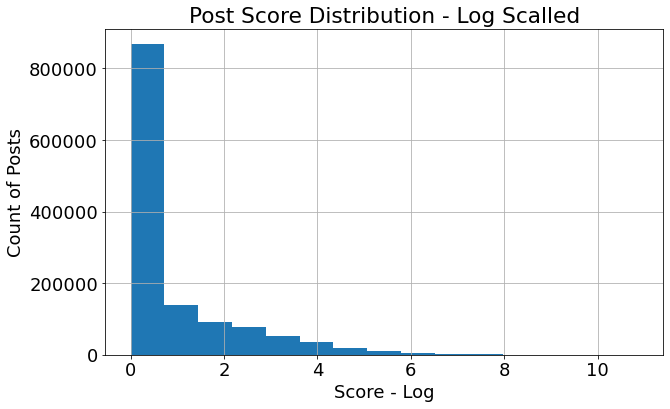

In [4]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()
(pd.DataFrame(subs[subs.author!='[deleted]'].groupby('id').score.sum()).score+1).apply(np.log).hist(bins=15)

plt.xlabel('Score - Log')
plt.ylabel('Count of Posts')
plt.title('Post Score Distribution - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



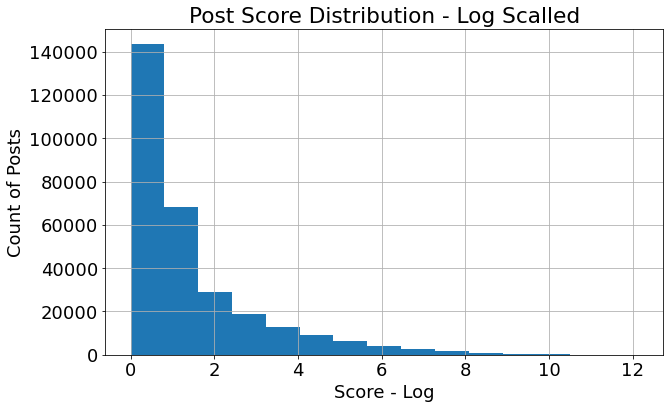

In [5]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()
(pd.DataFrame(subs[subs.author!='[deleted]'].groupby('author').score.sum()).score+1).apply(np.log).hist(bins=15)

plt.xlabel('Score - Log')
plt.ylabel('Count of Posts')
plt.title('Post Score Distribution - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



<Figure size 720x432 with 0 Axes>

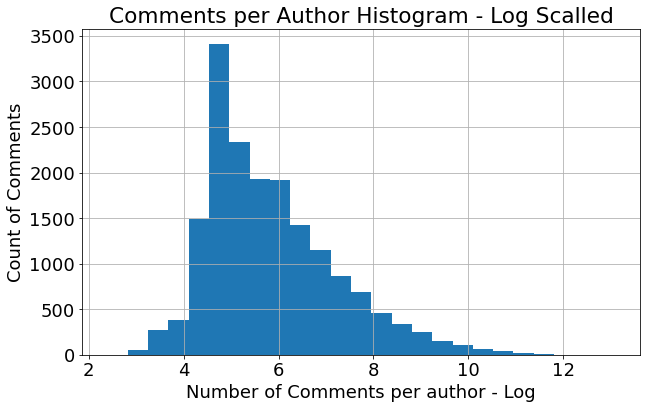

In [6]:
temp=subs.groupby('author').sum().awards_value.sort_values(ascending=False).tail(-1).apply(lambda x: np.log(x+1))
temp=temp[temp>0].reset_index().rename(columns={'id':'Comments Volume Log','author':'Author'})
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
plt.figure()
temp.hist(bins=25)
plt.xlabel('Number of Comments per author - Log')
plt.ylabel('Count of Comments')
plt.title('Comments per Author Histogram - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_comment_hist.png',bbox_inches='tight')
plt.show()



## scatter


In [144]:
subs.corr()

,author_karma,author_posts,num_comments,score,awards_value,volume
author_karma,1.000000,-0.055019,0.182656,0.029146,0.021967,NaN
author_posts,-0.055019,1.000000,-0.011160,-0.020888,-0.011435,NaN
num_comments,0.182656,-0.011160,1.000000,0.145173,0.158672,NaN
score,0.029146,-0.020888,0.145173,1.000000,0.568729,NaN
awards_value,0.021967,-0.011435,0.158672,0.568729,1.000000,NaN
volume,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
((bs.isnull() | bs.isna()).sum() * 100 / bs.index.size).round(2)[['sell', 'buy',
       'sent_ntusd', 'sent_ntusd_wavg', 'sent_ntusd_coms',
       'sent_ntusd_coms_wavg', 'sent_lr', 'sent_lr_coms', 'sent_db', 'sent_fb',
       'sent_fbt', 'sent_dbe_sadness', 'sent_dbe_joy', 'sent_dbe_love',
       'sent_dbe_anger', 'sent_dbe_fear', 'sent_dbe_surprise', 'volume']]